In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [8]:
df=pd.read_csv("../Datasets/Asthma.csv")
df.head()

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Severity_Mild,Severity_Moderate,Severity_None
0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
2,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,0,0
3,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0
4,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1,0,1,0


In [10]:
df['Asthma_Output'] = (df['Severity_Mild'] | df['Severity_Moderate']).astype(int)

In [ ]:
# Drop the columns
df = df.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None'], axis=1) 


In [22]:
df.sample(10)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Asthma_Output
212157,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
48245,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1
146960,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0
149029,0,1,1,1,0,1,1,1,0,0,0,0,1,0,1,0,1
108662,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1
31745,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,1,1
161939,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
78227,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0
113891,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
162650,1,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1


In [23]:
df.columns

Index(['Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
       'None_Sympton', 'Pains', 'Nasal-Congestion', 'Runny-Nose',
       'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59',
       'Age_60+', 'Gender_Female', 'Gender_Male', 'Asthma_Output'],
      dtype='object')

<Axes: >

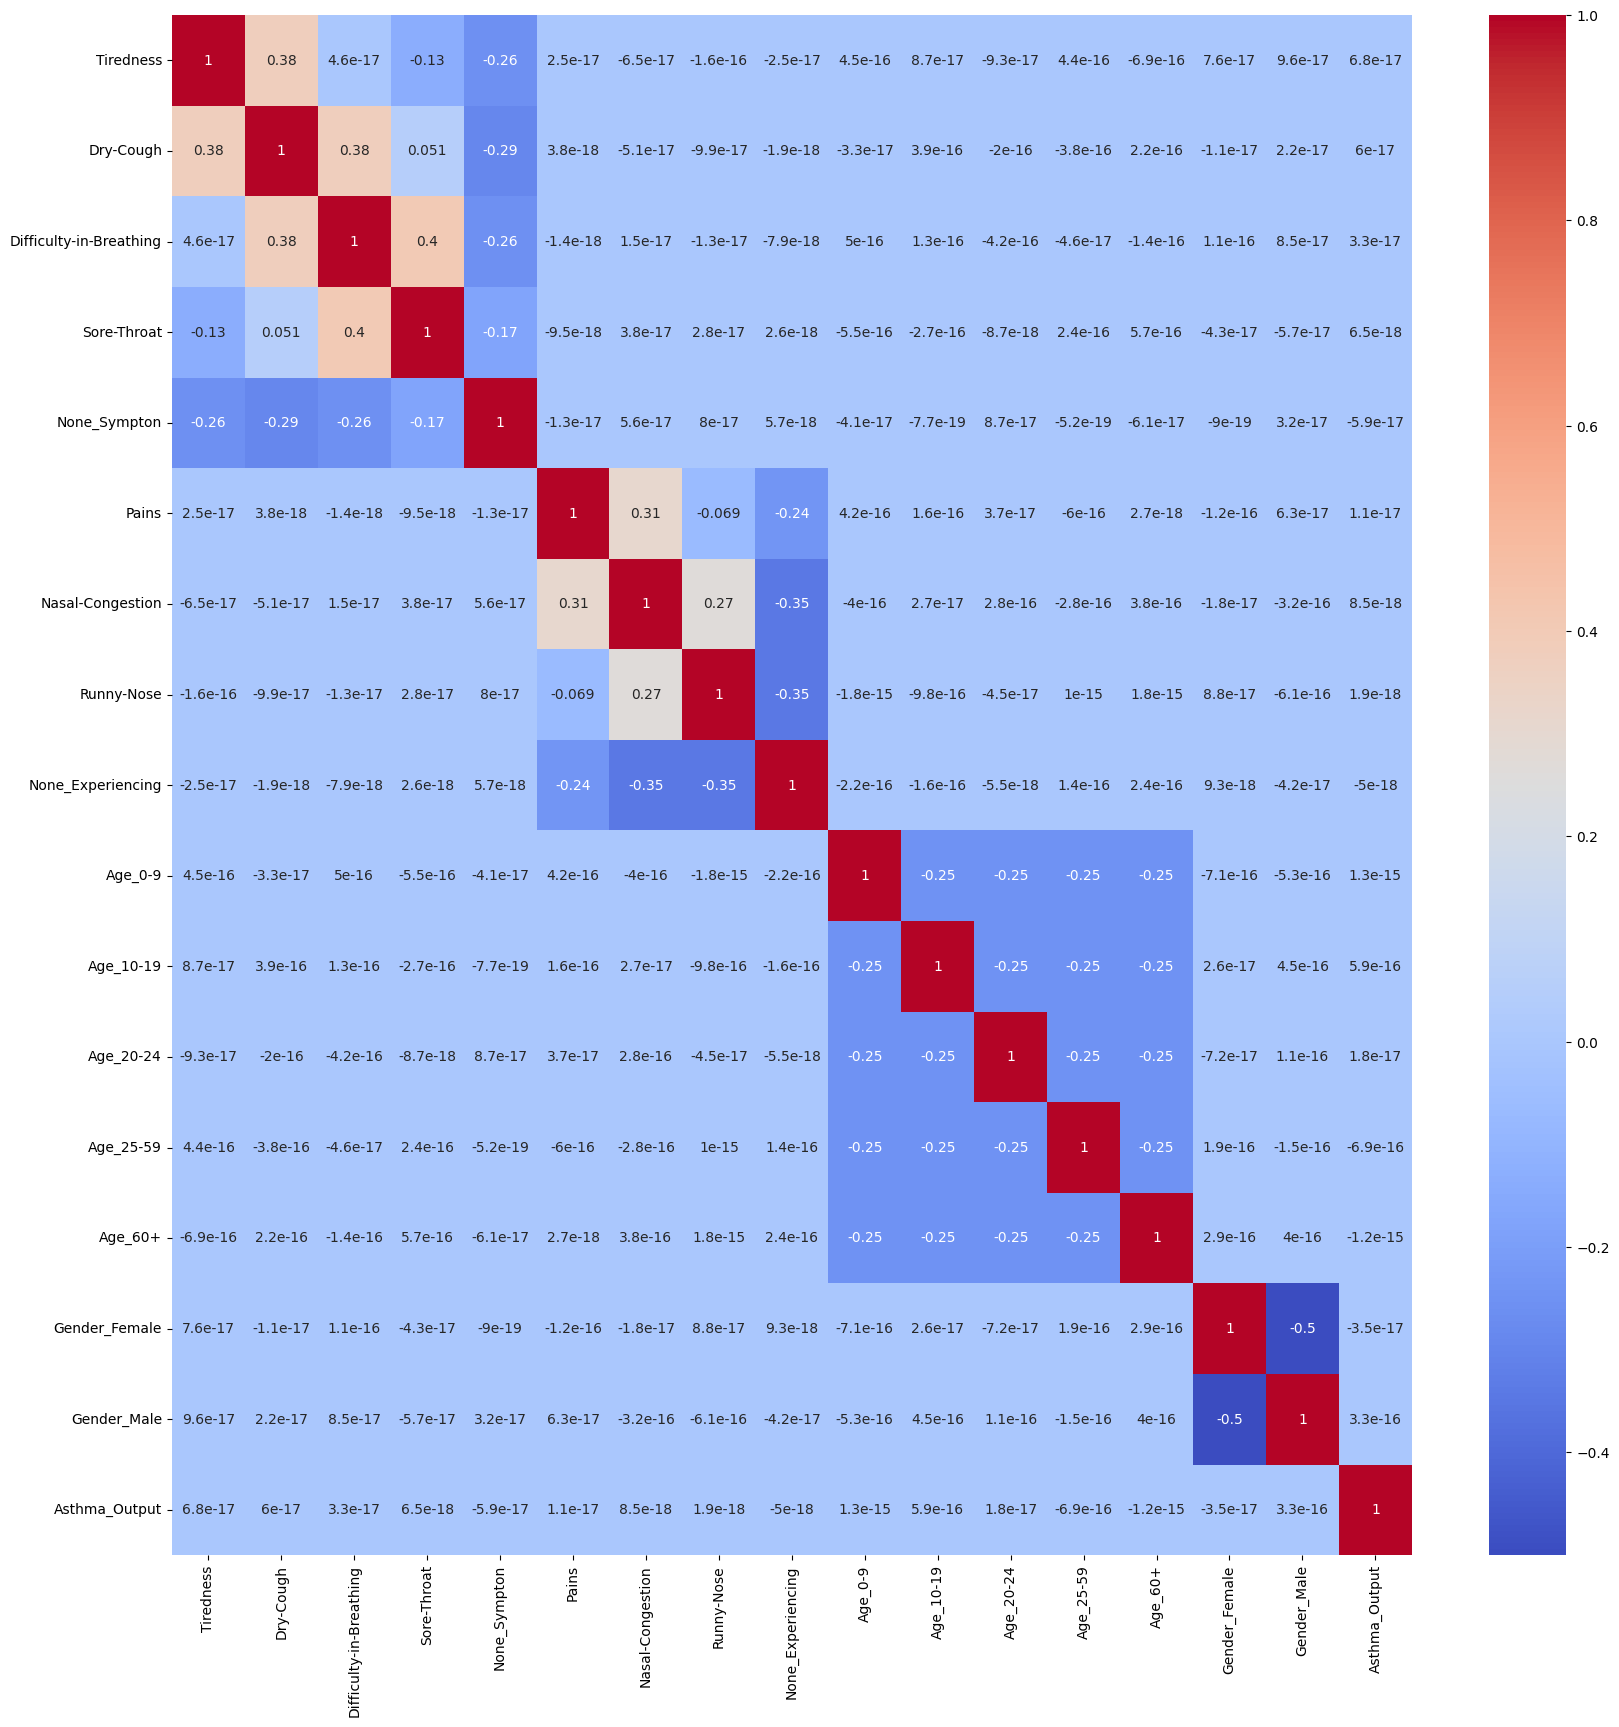

In [24]:
import seaborn as sns
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True, cmap='coolwarm')

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(['Asthma_Output'], axis=1)
y = df['Asthma_Output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
X_train.sample(10)

,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male
270062,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
292105,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
20513,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
158784,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1
271147,1,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0
25440,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
214196,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0
132749,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
14520,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1
250925,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0


In [32]:
y_train.sample(10)

227311    0
132042    0
143416    1
81393     0
69855     1
46452     1
91508     0
79023     1
70723     0
291618    0
Name: Asthma_Output, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize models
LGR = LogisticRegression(max_iter=10000)  # increase max_iter if needed
decisionTree = DecisionTreeClassifier()
svc = SVC()

# Hyperparameter grids for each model
param_grid_lgr = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['lbfgs', 'liblinear'],  # Solver to use
    'penalty': ['l2', 'none'],  # Regularization type
    'max_iter': [100, 200, 300]  # Maximum iterations (increase if convergence issues)
}

param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Function to measure quality of a split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # The number of features to consider for the best split
}

param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function (used for 'poly' kernel)
    'coef0': [0, 1, 2]  # Independent term in the kernel function
}

# Perform GridSearchCV for each model


In [37]:
grid_search_lgr = GridSearchCV(LGR, param_grid_lgr, cv=5, n_jobs=-1)
grid_search_dt = GridSearchCV(decisionTree, param_grid_dt, cv=5, n_jobs=-1)
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, n_jobs=-1) 

In [38]:
# Fit the grid searches
grid_search_lgr.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
grid_search_dt.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/

KeyboardInterrupt: 

In [39]:


# Define models
LGR = LogisticRegression()
decisionTree = DecisionTreeClassifier()
svc = SVC()

# Hyperparameter grids
param_grid_LGR = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10],  # Regularization parameter
    'solver': ['saga'],  # 'saga' is required for elasticnet penalty
}

param_grid_decisionTree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'max_features': ['sqrt', 'log2', None],  # Corrected to valid values
    'criterion': ['gini', 'entropy']
}

param_grid_svc = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search with cross-validation



In [ ]:
grid_search_LGR = GridSearchCV(LGR, param_grid_LGR, cv=5, verbose=1, n_jobs=-1)
grid_search_LGR.fit(X_train, y_train)

grid_search_decisionTree = GridSearchCV(decisionTree, param_grid_decisionTree, cv=5, verbose=1, n_jobs=-1)
grid_search_decisionTree.fit(X_train, y_train)

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, verbose=1, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

# Print the best parameters for each model
print(f"Best parameters for LogisticRegression: {grid_search_LGR.best_params_}")
print(f"Best parameters for DecisionTreeClassifier: {grid_search_decisionTree.best_params_}")
print(f"Best parameters for SVC: {grid_search_svc.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
